In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [50]:
df = pd.read_csv(r"C:\Users\Nikhil G\Documents\Projects\House price prediction\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Exploratory data Analysis (EDA)

In [51]:
df.shape

(13320, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [53]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [54]:
for column in df.columns:
    print(df[column].value_counts())
    print('*'*30)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
******************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
******************************
location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64
******************************
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826

Cleaning Data

In [55]:
df.drop(columns=['availability','society'],inplace=True)

In [56]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [57]:
df['size'] = df['size'].fillna('0').str.split().str.get(0).astype(int)
median=df['size'].median()
df['size']=df['size'].replace(0,median)


median = df['bath'].median()
df['bath'] = df['bath'].fillna(median)


median = df['balcony'].median()
df['balcony'] = df['balcony'].fillna(median)

In [58]:
df=df.dropna()

In [59]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [60]:
def convertrange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

df["total_sqft"]=df["total_sqft"].apply(convertrange)

In [61]:
df["price_per_sqft"]=df["price"]*100000/df["total_sqft"]

In [62]:
df = df.rename(columns={'size': 'BHK', 'price': 'price_in_lakhs'})

In [63]:
df.head()

,area_type,location,BHK,total_sqft,bath,balcony,price_in_lakhs,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


Removing outliers

In [64]:
df["location"]=df['location'].apply(lambda x:x.strip())
location_count=df["location"].value_counts()
location_count_less_10=location_count[location_count<=10]
df["location"]=df["location"].apply(lambda x:"others" if x in location_count_less_10 else x)
df['location'].value_counts()

location
others                       2885
Whitefield                    541
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [65]:
(df["total_sqft"]/df["BHK"]).describe()

count    13273.000000
mean       574.629098
std        387.586770
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [66]:
df=df[((df["total_sqft"]/df["BHK"])>=300)]

In [67]:
df.price_per_sqft.describe()

count     12529.000000
mean       6304.053504
std        4162.395819
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [68]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-st)) &(subdf.price_per_sqft <= (m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df=remove_outliers_sqft(df)
df.describe()

,BHK,total_sqft,bath,balcony,price_in_lakhs,price_per_sqft
count,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,2.575340,1508.431719,2.471650,1.607476,91.286885,5659.090455
std,0.897642,880.736507,0.979483,0.786206,86.346962,2265.883017
min,1.000000,300.000000,1.000000,0.000000,10.000000,1250.000000
25%,2.000000,1110.000000,2.000000,1.000000,49.000000,4244.864208
50%,2.000000,1286.000000,2.000000,2.000000,67.000000,5175.519668
75%,3.000000,1650.000000,3.000000,2.000000,100.000000,6428.571429
max,16.000000,30400.000000,16.000000,3.000000,2200.000000,24509.803922


In [69]:
def remove_outliers_BHK(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        BHK_stats={}
        for BHK,BHK_df in location_df.groupby("BHK"):
            BHK_stats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats =BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis="index")

df=remove_outliers_BHK(df)

In [70]:
df.shape

(7360, 8)

In [71]:
df.head()

,area_type,location,BHK,total_sqft,bath,balcony,price_in_lakhs,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333
3,Built-up Area,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668


Visualizations

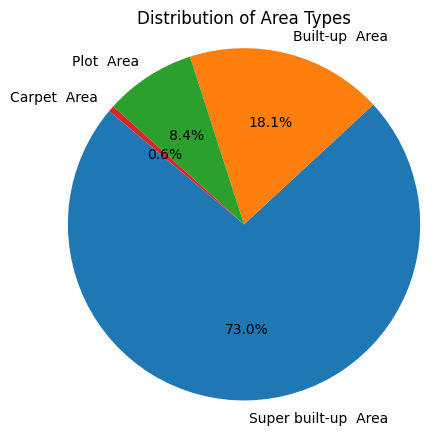

In [72]:
area_type_counts = df['area_type'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Area Types')
plt.axis('equal') 
plt.show()

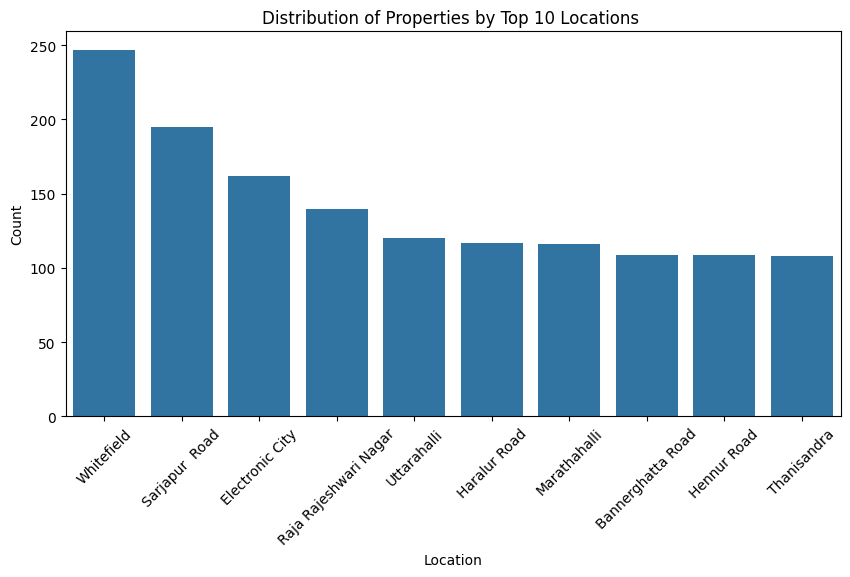

In [73]:
location_counts = df['location'].value_counts()
top_10_locations = location_counts.head(11).index
top_10_locations = top_10_locations[1:]
filtered_df = df[df['location'].isin(top_10_locations)]

plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, x='location', order=top_10_locations)
plt.title('Distribution of Properties by Top 10 Locations ')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

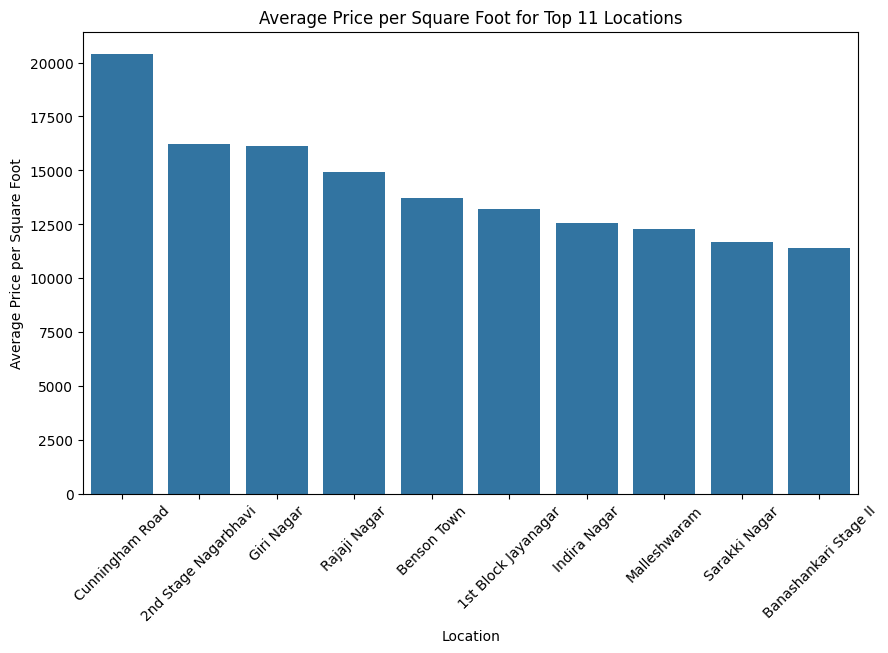

In [74]:
location_avg_price = df.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False)
top_10_locations_excluding_top_1 = location_avg_price.iloc[1:11]
top_10_df = top_10_locations_excluding_top_1.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_df, x='location', y='price_per_sqft', order=top_10_df['location'])
plt.title('Average Price per Square Foot for Top 11 Locations')
plt.xlabel('Location')
plt.ylabel('Average Price per Square Foot')
plt.xticks(rotation=45)
plt.show()

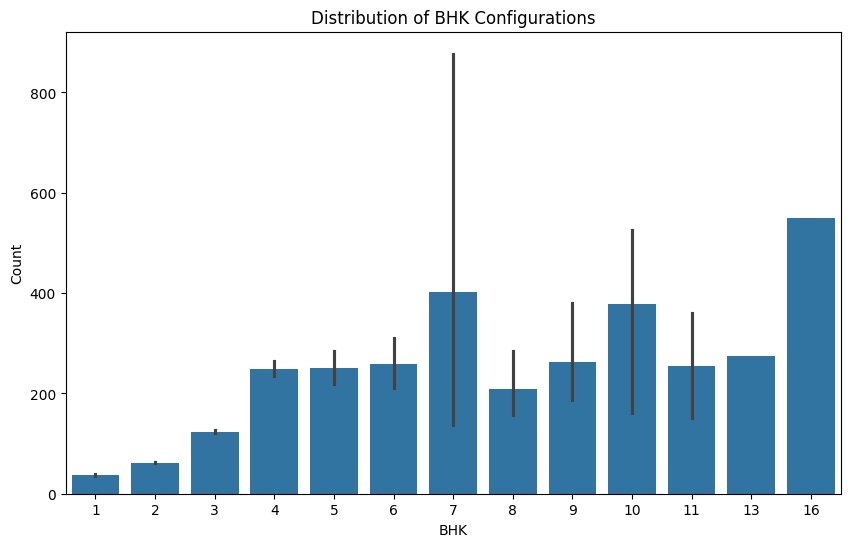

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='BHK',y='price_in_lakhs')
plt.title('Distribution of BHK Configurations')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

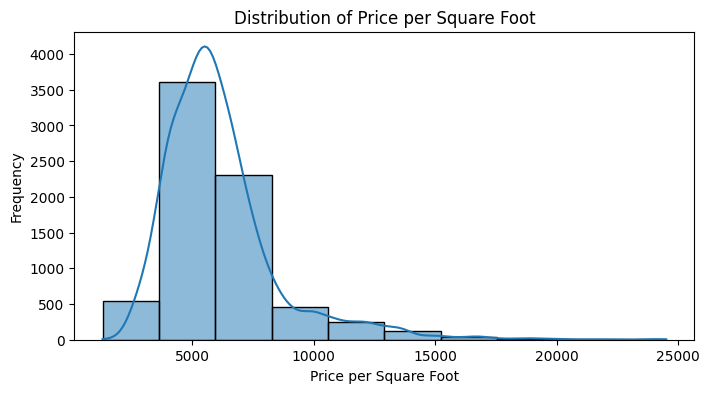

In [76]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price_per_sqft'], bins=10, kde=True)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

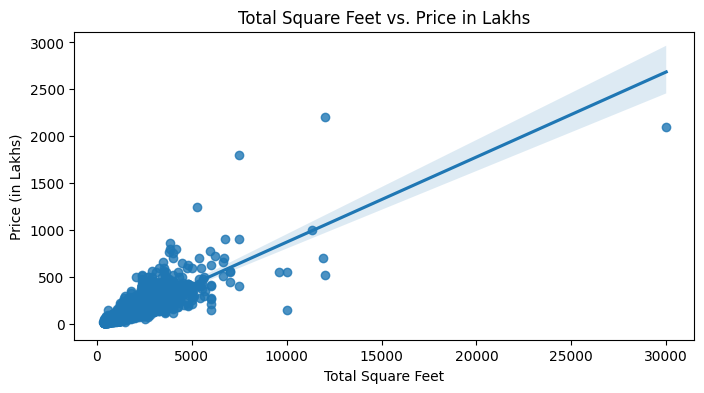

In [77]:
plt.figure(figsize=(8, 4))
sns.regplot(data=df, x='total_sqft', y='price_in_lakhs')
plt.title('Total Square Feet vs. Price in Lakhs')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in Lakhs)')
plt.show()

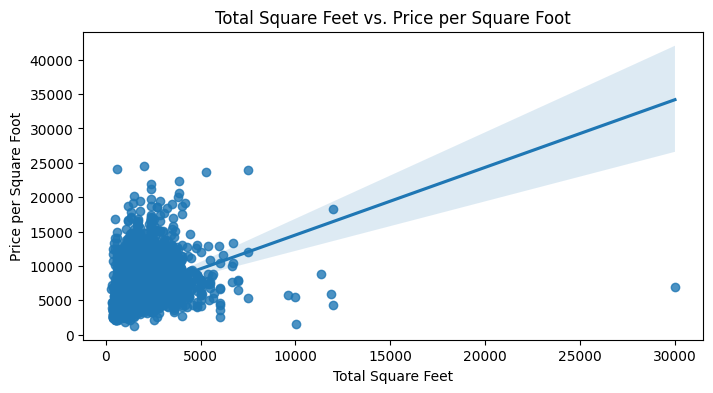

In [78]:
plt.figure(figsize=(8, 4))
sns.regplot(x='total_sqft', y='price_per_sqft', data=df)
plt.title('Total Square Feet vs. Price per Square Foot')
plt.xlabel('Total Square Feet')
plt.ylabel('Price per Square Foot')
plt.show()

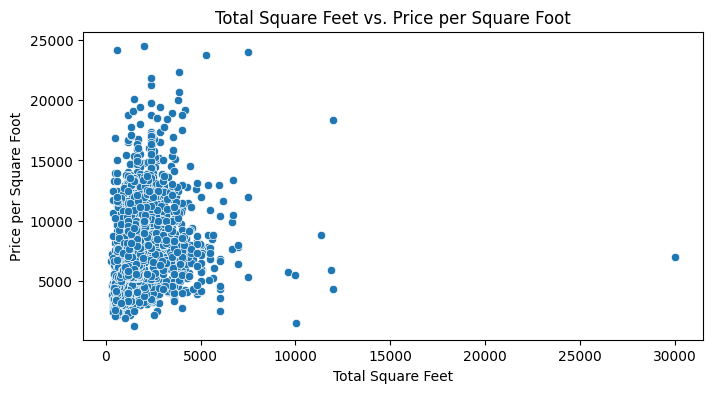

In [79]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='total_sqft', y='price_per_sqft')
plt.title('Total Square Feet vs. Price per Square Foot')
plt.xlabel('Total Square Feet')
plt.ylabel('Price per Square Foot')
plt.show()

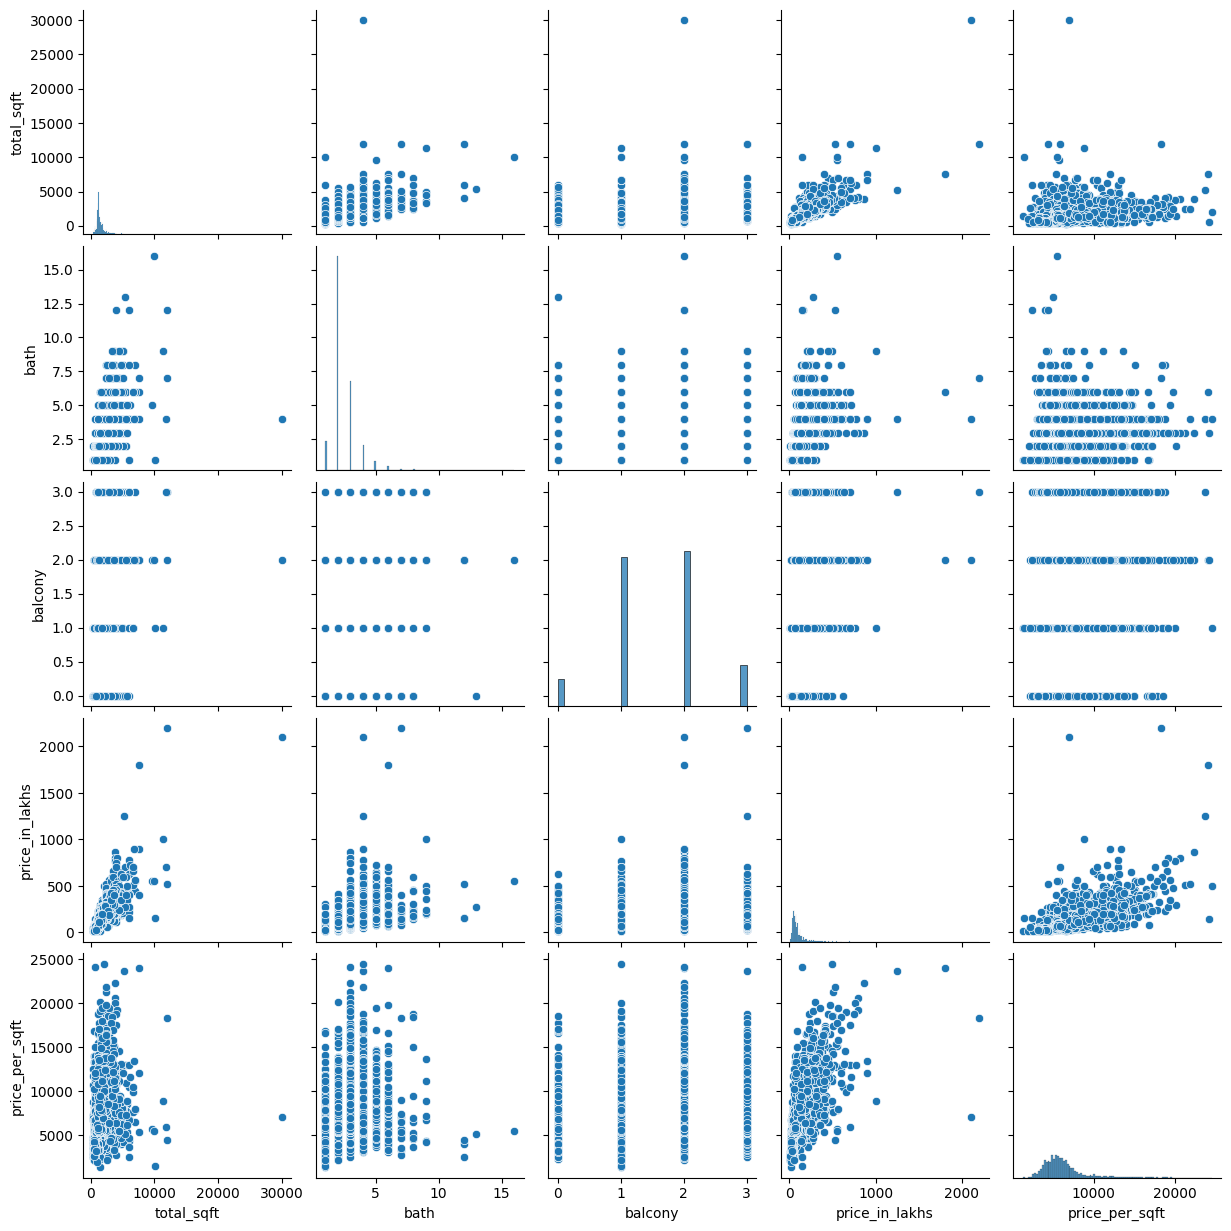

In [80]:
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price_in_lakhs', 'price_per_sqft']])
plt.show()

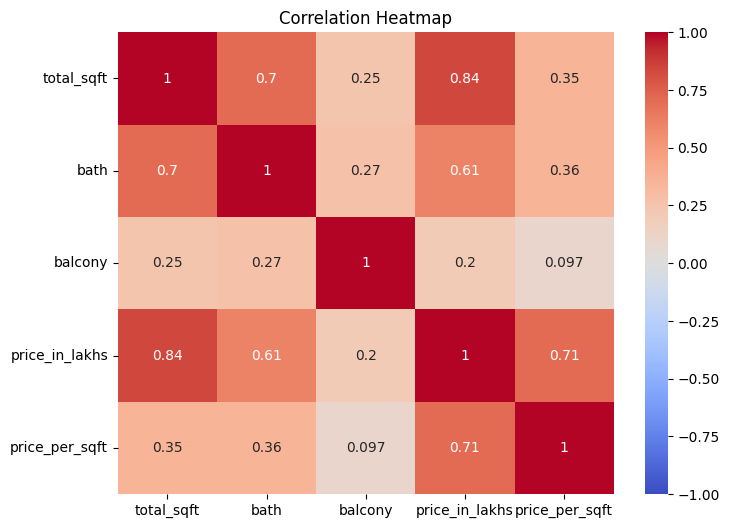

In [81]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['total_sqft', 'bath', 'balcony', 'price_in_lakhs', 'price_per_sqft']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Cleaned Dataset

In [82]:
df.drop(columns=["price_per_sqft"],inplace=True)

In [83]:
df.head()

,area_type,location,BHK,total_sqft,bath,balcony,price_in_lakhs
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0
3,Built-up Area,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0


In [84]:
df.to_csv(r'C:\Users\Nikhil G\Documents\Projects\House price prediction\cleaned_datset.csv')

Importing the necessary libraries

In [85]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [86]:
x = df.drop(columns=['price_in_lakhs'])
y = df['price_in_lakhs']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(5888, 6)
(1472, 6)


In [87]:
# One-hot encoding for categorical features
categorical_features=['area_type','location']
numeric_features = ['BHK','total_sqft','bath','balcony']


#preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)


Linear Regression

In [88]:
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


model_lr.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type', 'location']),
                                                 ('num', StandardScaler(),
                                                  ['BHK', 'total_sqft', 'bath',
                                                   'balcony'])])),
                ('regressor', LinearRegression())])

In [89]:
y_pred = model_lr.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) of Linear Regression: {mae}")
print(f"Mean Squared Error (MSE) of Linear Regression: {mse}")
print(f"Root Mean Squared Error (RMSE) of Linear Regression: {rmse}")
print(f"R-squared (R2) of Linear Regression: {r2}")
print(f"Accuracy of Linear Regression:",round((100-mae),2),"%")

Mean Absolute Error (MAE) of Linear Regression: 18.567953252377716
Mean Squared Error (MSE) of Linear Regression: 1189.4624949444978
Root Mean Squared Error (RMSE) of Linear Regression: 34.488584994813834
R-squared (R2) of Linear Regression: 0.8577798916010604
Accuracy of Linear Regression: 81.43 %


Lasso Regression

In [90]:
model_lasso= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])


model_lasso.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type', 'location']),
                                                 ('num', StandardScaler(),
                                                  ['BHK', 'total_sqft', 'bath',
                                                   'balcony'])])),
                ('regressor', Lasso())])

In [91]:
y_pred = model_lasso.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) of Lasso Regression: {mae}")
print(f"Mean Squared Error (MSE) of Lasso Regression: {mse}")
print(f"Root Mean Squared Error (RMSE) of Lasso Regression: {rmse}")
print(f"R-squared (R2) of Lasso Regression: {r2}")
print(f"Accuracy of Lasso Regression:",round((100-mae),2),"%")

Mean Absolute Error (MAE) of Lasso Regression: 24.359769467959467
Mean Squared Error (MSE) of Lasso Regression: 2424.671683052891
Root Mean Squared Error (RMSE) of Lasso Regression: 49.24095534260978
R-squared (R2) of Lasso Regression: 0.7100900019451963
Accuracy of Lasso Regression: 75.64 %


Ridge Regression

In [92]:
model_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])


model_ridge.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type', 'location']),
                                                 ('num', StandardScaler(),
                                                  ['BHK', 'total_sqft', 'bath',
                                                   'balcony'])])),
                ('regressor', Ridge())])

In [93]:
y_pred = model_ridge.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) of Ridge Regression: {mae}")
print(f"Mean Squared Error (MSE) of Ridge Regression: {mse}")
print(f"Root Mean Squared Error (RMSE) of Ridge Regression: {rmse}")
print(f"R-squared (R2) of Ridge Regression: {r2}")
print(f"Accuracy of Ridge Regression:",round((100-mae),2),"%")

Mean Absolute Error (MAE) of Ridge Regression: 18.38090164074562
Mean Squared Error (MSE) of Ridge Regression: 1205.3630274179002
Root Mean Squared Error (RMSE) of Ridge Regression: 34.718338488728115
R-squared (R2) of Ridge Regression: 0.8558787173634703
Accuracy of Ridge Regression: 81.62 %


Random Forest Regression

In [94]:
model_RFR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


model_RFR.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type', 'location']),
                                                 ('num', StandardScaler(),
                                                  ['BHK', 'total_sqft', 'bath',
                                                   'balcony'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [95]:
y_pred = model_RFR.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) of Random Forest Regression: {mae}")
print(f"Mean Squared Error (MSE) of Random Forest Regression: {mse}")
print(f"Root Mean Squared Error (RMSE) of Random Forest Regression: {rmse}")
print(f"R-squared (R2) of Random Forest Regression: {r2}")
print(f"Accuracy of Random Forest Regression:",round((100-mae),2),"%")

Mean Absolute Error (MAE) of Random Forest Regression: 16.52373278023704
Mean Squared Error (MSE) of Random Forest Regression: 1328.2031947435003
Root Mean Squared Error (RMSE) of Random Forest Regression: 36.44452215002277
R-squared (R2) of Random Forest Regression: 0.841191123608271
Accuracy of Random Forest Regression: 83.48 %


Saving the best model with high accuracy and low error value

In [96]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model_RFR, model_file)
